In [1]:
import twint
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from wordcloud import WordCloud

In [49]:
# c = twint.Config()
# c.Search = "reopen theatres"
# c.Min_likes = 30

# twint.run.Search(c)

In [11]:
csv = pd.read_csv('file3.csv')
df = csv.tweet
csv.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1295454024888651776,1295454024888651776,1597695282000,2020-08-17,16:14:42,EDT,1047865070972293120,supportbritish,U.K. Actors Support Network,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1047865070972293120', 'username'...",NaN,NaN,NaN,NaN
1,1295452931353976841,1295403666703151105,1597695021000,2020-08-17,16:10:21,EDT,103096075,paullferrer,Paul Ferrer,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '103096075', 'username': 'paullfe...",NaN,NaN,NaN,NaN
2,1295449912889483264,1295447373515300866,1597694302000,2020-08-17,15:58:22,EDT,15758848,safc4ever,John Dunne ♿👨🏻‍🦼,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '15758848', 'username': 'safc4eve...",NaN,NaN,NaN,NaN
3,1295449467198541825,1295444217582452738,1597694195000,2020-08-17,15:56:35,EDT,1347251682,beckiebinks,Beckieeeee❤️Jagmac❤️🐝,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1347251682', 'username': 'beckie...",NaN,NaN,NaN,NaN
4,1295447613261656070,1295447579136753671,1597693753000,2020-08-17,15:49:13,EDT,1247136458999238658,offstagehub,OFFSTAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1247136458999238658', 'username'...",NaN,NaN,NaN,NaN


In [12]:
df.head()

0    Once Theatres do reopen is there any particula...
1    Movie Theatres add 10% ($11.3bn BO and similar...
2    You'll be back. I wish I could guess when, but...
3    @OliverDowden Theatres and live streams of per...
4    Finally for Theatre News, venues across the UK...
Name: tweet, dtype: object

In [13]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+','', text)
    return text

csv['tweet'] = csv['tweet'].apply(clean_text)

In [14]:
csv.tweet.head()

0    Once Theatres do reopen is there any particula...
1    Movie Theatres add 10% ($11.3bn BO and similar...
2    You'll be back. I wish I could guess when, but...
3     Theatres and live streams of performances , N...
4    Finally for Theatre News, venues across the UK...
Name: tweet, dtype: object

### Subjectivity is how opinionated the tweet is. 
#### i.e., 0 is not opinionated, 1 is very opinionated 
### Polarity is how positive/negative the review is. 
#### i.e., -1 is negative, 0 is neutral, 1 is positive

In [54]:
def get_subj(text):
    return TextBlob(text).sentiment.subjectivity

# polarity
def get_polar(text):
    return TextBlob(text).sentiment.polarity

csv['Subjectivity'] = csv['tweet'].apply(get_subj)
csv['Polarity'] = csv['tweet'].apply(get_polar)

csv['Polarity'].describe()

count    935.000000
mean       0.087999
std        0.218255
min       -0.859375
25%        0.000000
50%        0.000000
75%        0.200000
max        1.000000
Name: Polarity, dtype: float64

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


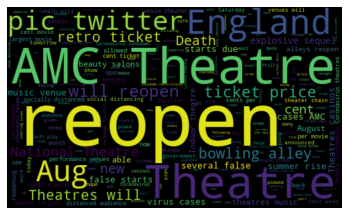

In [56]:
# word cloud
words = ' '.join([twt for twt in csv['tweet']])
wordCloud = WordCloud(width = 500, height = 300, random_state=100, max_font_size = 110).generate(words)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

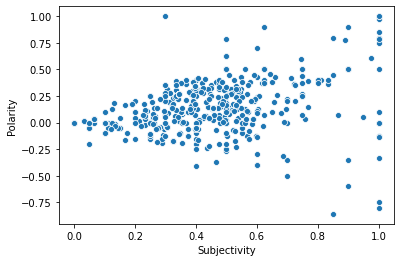

In [57]:
sns.scatterplot(x=csv['Subjectivity'], y=csv['Polarity'])

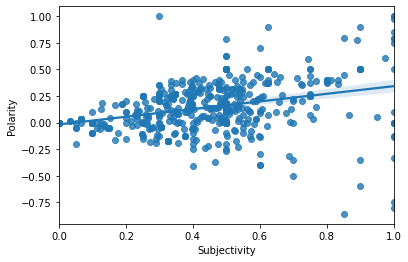

In [58]:
x=csv['Subjectivity']
y=csv['Polarity']
sns.regplot(x,y)

In [2]:
test = pd.read_csv('file3.csv')

In [3]:
test.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1295454024888651776,1295454024888651776,1597695282000,2020-08-17,16:14:42,EDT,1047865070972293120,supportbritish,U.K. Actors Support Network,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1047865070972293120', 'username'...",NaN,NaN,NaN,NaN
1,1295452931353976841,1295403666703151105,1597695021000,2020-08-17,16:10:21,EDT,103096075,paullferrer,Paul Ferrer,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '103096075', 'username': 'paullfe...",NaN,NaN,NaN,NaN
2,1295449912889483264,1295447373515300866,1597694302000,2020-08-17,15:58:22,EDT,15758848,safc4ever,John Dunne ♿👨🏻‍🦼,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '15758848', 'username': 'safc4eve...",NaN,NaN,NaN,NaN
3,1295449467198541825,1295444217582452738,1597694195000,2020-08-17,15:56:35,EDT,1347251682,beckiebinks,Beckieeeee❤️Jagmac❤️🐝,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1347251682', 'username': 'beckie...",NaN,NaN,NaN,NaN
4,1295447613261656070,1295447579136753671,1597693753000,2020-08-17,15:49:13,EDT,1247136458999238658,offstagehub,OFFSTAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1247136458999238658', 'username'...",NaN,NaN,NaN,NaN


In [4]:
test.tweet

0      Once Theatres do reopen is there any particula...
1      Movie Theatres add 10% ($11.3bn BO and similar...
2      You'll be back. I wish I could guess when, but...
3      @OliverDowden Theatres and live streams of per...
4      Finally for Theatre News, venues across the UK...
                             ...                        
930    AMC Theatres to reopen Aug. 20 with 15-cent mo...
931    AMC Theatres will reopen Aug. 20 with 15-cent ...
932    After being closed since March due to the COVI...
933    AMC to reopen over 100 theatres on Aug. 20, in...
934    AMC Theatres to reopen Aug. 20 with 15-cent ti...
Name: tweet, Length: 935, dtype: object

In [5]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+','', text)
    return text

test['tweet'] = test['tweet'].apply(clean_text)
test.tweet.head()

0    Once Theatres do reopen is there any particula...
1    Movie Theatres add 10% ($11.3bn BO and similar...
2    You'll be back. I wish I could guess when, but...
3     Theatres and live streams of performances , N...
4    Finally for Theatre News, venues across the UK...
Name: tweet, dtype: object

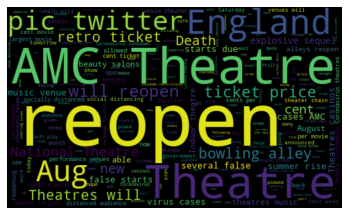

In [7]:
test_words = ' '.join([a for a in test['tweet']])
wordCloud = WordCloud(width = 500, height = 300, random_state=100, max_font_size = 110).generate(test_words)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
test.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1295454024888651776,1295454024888651776,1597695282000,2020-08-17,16:14:42,EDT,1047865070972293120,supportbritish,U.K. Actors Support Network,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1047865070972293120', 'username'...",NaN,NaN,NaN,NaN
1,1295452931353976841,1295403666703151105,1597695021000,2020-08-17,16:10:21,EDT,103096075,paullferrer,Paul Ferrer,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '103096075', 'username': 'paullfe...",NaN,NaN,NaN,NaN
2,1295449912889483264,1295447373515300866,1597694302000,2020-08-17,15:58:22,EDT,15758848,safc4ever,John Dunne ♿👨🏻‍🦼,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '15758848', 'username': 'safc4eve...",NaN,NaN,NaN,NaN
3,1295449467198541825,1295444217582452738,1597694195000,2020-08-17,15:56:35,EDT,1347251682,beckiebinks,Beckieeeee❤️Jagmac❤️🐝,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1347251682', 'username': 'beckie...",NaN,NaN,NaN,NaN
4,1295447613261656070,1295447579136753671,1597693753000,2020-08-17,15:49:13,EDT,1247136458999238658,offstagehub,OFFSTAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1247136458999238658', 'username'...",NaN,NaN,NaN,NaN


In [9]:
df.head()

NameError: name 'df' is not defined

In [10]:
csv.head()



NameError: name 'csv' is not defined

In [15]:
another = pd.read_csv('file4.csv')

In [16]:
another.tweet = another.tweet.apply(clean_text)

In [17]:
another.tweet.head()

0    “It’s starting to not make sense here. When yo...
1                when will they reopen the stables ???
2    please sir donot reopen college as health is m...
3    Lads would they ever reopen gyms cause road ru...
4    The company announced it will be offering retr...
Name: tweet, dtype: object

In [28]:
def get_subj(text):
    return TextBlob(text).sentiment.subjectivity

# polarity
def get_polar(text):
    return TextBlob(text).sentiment.polarity

another['Subjectivity'] = another.tweet.apply(get_subj)
another['Polarity'] = another.tweet.apply(get_polar)
j=another['Subjectivity']
k=another['Polarity']

count    294.000000
mean       0.341492
std        0.291474
min        0.000000
25%        0.000000
50%        0.333333
75%        0.508117
max        1.000000
Name: Subjectivity, dtype: float64

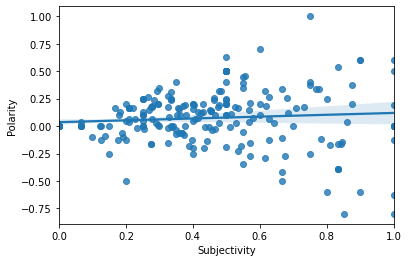

In [30]:
sns.regplot(j,k)
another['Subjectivity'].describe()

In [33]:
another[['Polarity', 'Subjectivity']].describe()

,Polarity,Subjectivity
count,294.000000,294.000000
mean,0.064084,0.341492
std,0.224177,0.291474
min,-0.800000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.333333
75%,0.175000,0.508117
max,1.000000,1.000000


In [39]:
another.tweet

0      “It’s starting to not make sense here. When yo...
1                  when will they reopen the stables ???
2      please sir donot reopen college as health is m...
3      Lads would they ever reopen gyms cause road ru...
4      The company announced it will be offering retr...
                             ...                        
289    Schools are preparing to reopen for in-person,...
290    Save Entertainment Industry, Reopen Cinemas – ...
291    I don’t think they could ever pay it back. Los...
292    Falz Calls On President Buhari & Osinbajo To R...
293    The only people are hurting are in corrupted D...
Name: tweet, Length: 294, dtype: object

### For 'reopen' search term, you can see movie theater is a pretty talked about topic! 

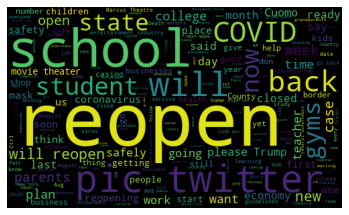

In [27]:
a = ' '.join([a for a in another['tweet']])
b = WordCloud(width = 500, height = 300, random_state=100, max_font_size = 110).generate(a)
plt.imshow(b)
plt.axis('off')
plt.show()

In [34]:
new_df=pd.read_csv('file5.csv')

In [37]:
new_df.shape

(376, 34)

In [41]:
filtered_df=pd.read_csv('file6.csv')
filtered_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1295716770276429829,1295707441217314817,1597757925000,2020-08-18,09:38:45,EDT,36947644,andrewgeczy,Andrew Geczy,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '36947644', 'username': 'AndrewGe...",NaN,NaN,NaN,NaN
1,1295716768695160838,1295716768695160838,1597757925000,2020-08-18,09:38:45,EDT,1271633269927239681,nardthesecond,nardestayan,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1271633269927239681', 'username'...",NaN,NaN,NaN,NaN
2,1295716765289283585,1295714273700839425,1597757924000,2020-08-18,09:38:44,EDT,401057559,perfectcows,˗ˏˋlexi⁷ˎˊ˗ 𓆏 nw: aot,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '401057559', 'username': 'perfect...",NaN,NaN,NaN,NaN
3,1295716764463104001,1295716764463104001,1597757924000,2020-08-18,09:38:44,EDT,1275061139668271105,nehajainx,.,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1275061139668271105', 'username'...",NaN,NaN,NaN,NaN
4,1295716761443106820,1295716761443106820,1597757923000,2020-08-18,09:38:43,EDT,3003234454,capitalmidsnews,Capital Midlands News,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '3003234454', 'username': 'Capita...",NaN,NaN,NaN,NaN


In [42]:
filtered_df.tweet = filtered_df.tweet.apply(clean_text)
filtered_df.tweet

0      The tall one got much redder hair between movi...
1      Sana nagweb dramas/mini series muna si jisoo o...
2                          Do you cry at tv shows/movies
3      Ab sad nhi rehna , Apne daily entertainment ke...
4      Nail bars, outdoor pools and beauty salons can...
                             ...                        
462    There are about 6 actors/actresses that I will...
463    sim, se não for no na Coreia, vão ser nós país...
464    I like bittersweet stuff, like in games, movie...
465    I just want to finally have some “time” to wat...
466    I think the original intention was to have thr...
Name: tweet, Length: 467, dtype: object

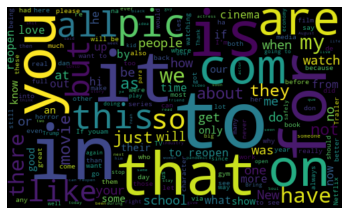

In [45]:
graph = ' '.join([tweet for tweet in filtered_df.tweet])
stopword=['entertainment', 'movies', 'twitter', 'the', 'of', 'with', 'and', ]
cloud=WordCloud(width=500, height=300, random_state=21, max_font_size=120, stopwords=stopword).generate(graph)

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

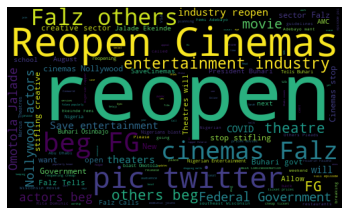

In [47]:
file7 = pd.read_csv('file7.csv')
file7.tweet = file7.tweet.apply(clean_text)
new_graph = ' '.join([tweet for tweet in file7.tweet])
new_cloud=WordCloud(width=500, height=300, random_state=21, max_font_size=120).generate(new_graph)
plt.imshow(new_cloud)
plt.axis('off')
plt.show()

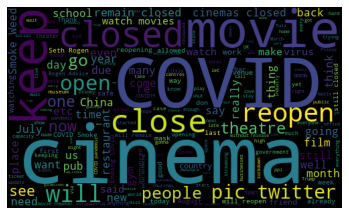

In [49]:
file8=pd.read_csv('file8.csv')
file8.tweet = file8.tweet.apply(clean_text)
graph8 = ' '.join([tweet for tweet in file8.tweet])
cloud8 = WordCloud(width=500, height=300, random_state=21, max_font_size=120).generate(graph8)
plt.imshow(cloud8)
plt.axis('off')
plt.show();

In [73]:
file8.shape

(595, 36)

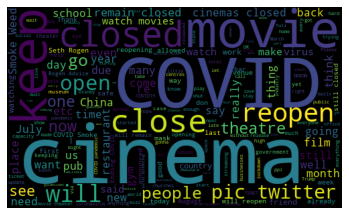

In [53]:
file8=pd.read_csv('file8.csv')
file8.tweet = file8.tweet.apply(clean_text)
graph8 = ' '.join([tweet for tweet in file8.tweet])
stop=['movie', 'cinema']
cloud8 = WordCloud(width=500, height=300, random_state=21, max_font_size=120).generate(graph8)
plt.imshow(cloud8, interpolation='kaiser')
plt.axis('off')
plt.show();

In [56]:
file8['subj'] = file8.tweet.apply(get_subj)
file8['polar'] = file8.tweet.apply(get_polar)
file8[['subj', 'polar']].describe()

,subj,polar
count,595.000000,595.000000
mean,0.342551,0.044492
std,0.234655,0.216527
min,0.000000,-0.800000
25%,0.150000,-0.056696
50%,0.350000,0.000000
75%,0.500000,0.136364
max,1.000000,1.000000


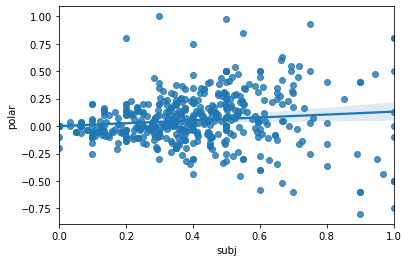

In [57]:
x=file8['subj']
y=file8['polar']
sns.regplot(x,y)

In [65]:
pos_sentence = 'Movie theatres  remain closed'
neg_sentence = 'Movie theaters  remain open'
neutr_sentence = 'I have cats'
TextBlob(neg_sentence).sentiment


Sentiment(polarity=0.0, subjectivity=0.5)

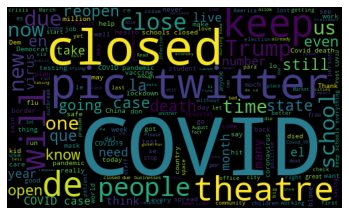

In [72]:
file9=pd.read_csv('file9.csv')
file9.tweet = file9.tweet.apply(clean_text)
graph9 = ' '.join([tweet for tweet in file9.tweet])
cloud9 = WordCloud(width=500, height=300, random_state=21, max_font_size=120).generate(graph9)
plt.imshow(cloud9, interpolation='kaiser')
plt.axis('off')
plt.show();